<a href="https://colab.research.google.com/github/jermanalopes/MachineLearningBasic/blob/main/ClustersEvaluationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Additional .py files to be used for cluster evaluation
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *


In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [10]:
#Using well-established "Iris" data and creating random data to evaluate cluster numbers.
iris = datasets.load_iris()
cluster1 = scale(iris.data)
cluster2 = scale(np.random.rand(150,4))
print(cluster1.shape)
print(cluster2.shape)

(150, 4)
(150, 4)


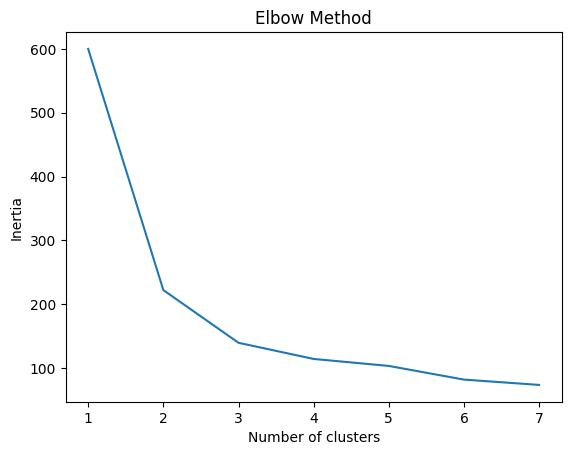

In [11]:
#Elbow Method for Iris data
inertia = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(cluster1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


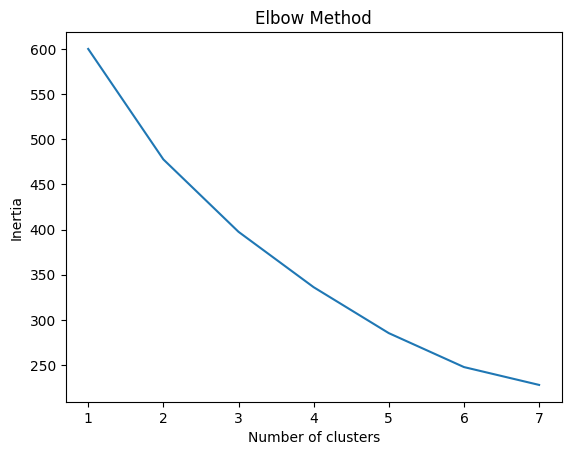

In [12]:
#Elbow Method for random data
inertia = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(cluster2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
#Hopkins Method --> the closer to 0, the better the data is to be clustered
print(hopkins(cluster1, 150))
print(hopkins(cluster2, 150))

0.18720094293677703
0.5007660542063953


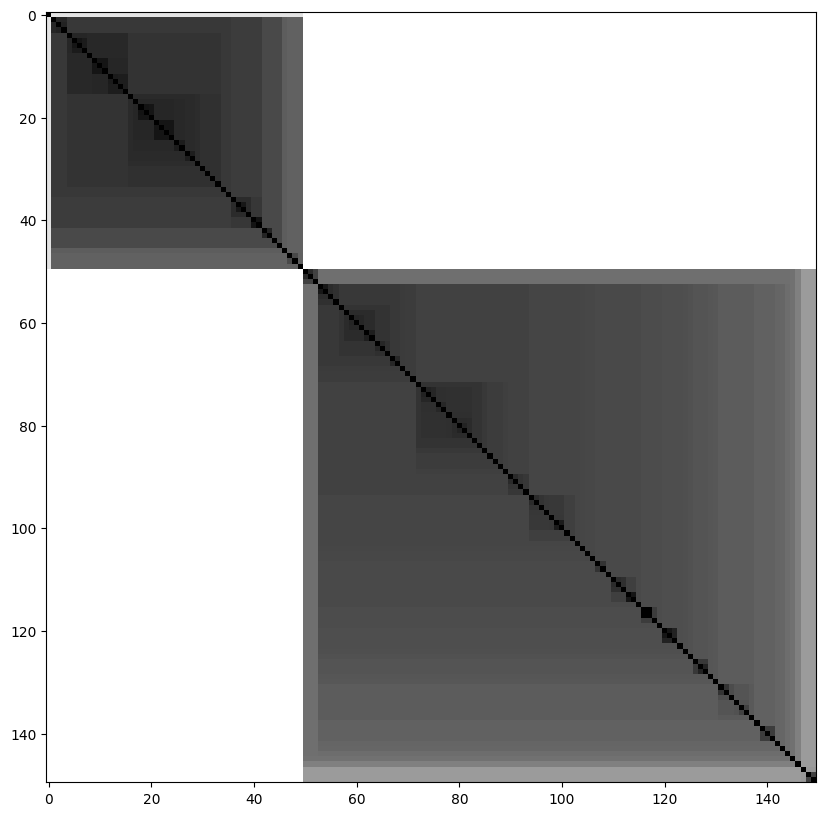

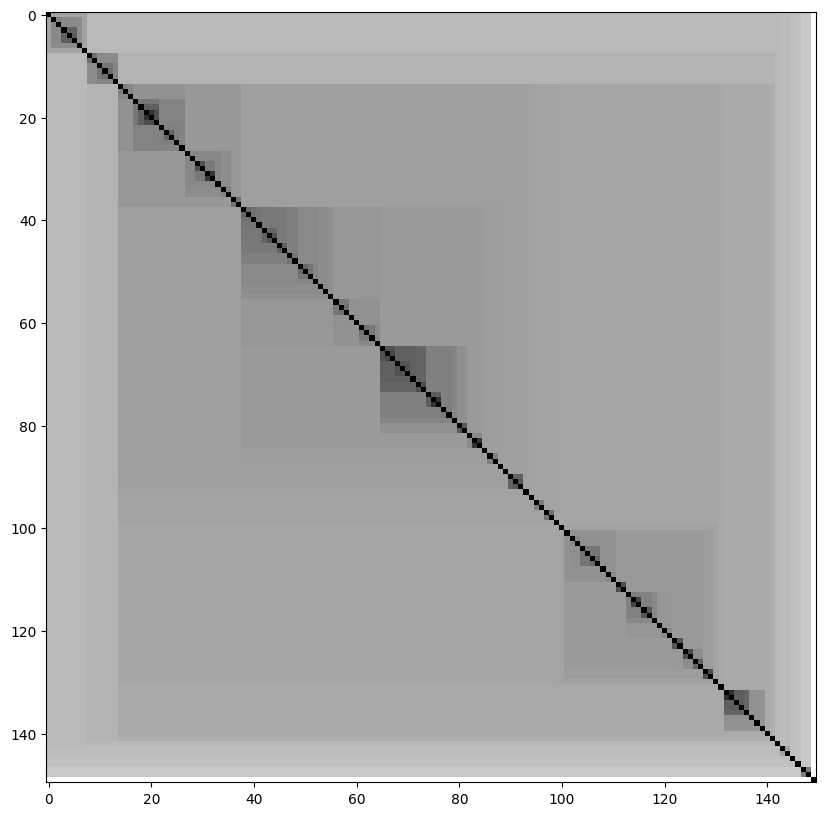

In [20]:
#Vat Test
ivat(cluster1)
ivat(cluster2)

In [29]:
#Methods for evaluation how many cluster the data has
m1 = assess_tendency_by_metric(cluster1, 'silhouette', 5)
print(m1)
m2 = assess_tendency_by_metric(cluster1, 'davies_bouldin', 5)
print(m2)
m3 = assess_tendency_by_metric(cluster1, 'calinski_harabasz', 5)
print(m3)
m4 = assess_tendency_by_mean_metric_score(cluster1)
print(m4)


m1_2 = assess_tendency_by_metric(cluster2, 'silhouette', 5)
print(m1_2)
m2_2 = assess_tendency_by_metric(cluster2, 'davies_bouldin', 5)
print(m2_2)
m3_2 = assess_tendency_by_metric(cluster2, 'calinski_harabasz', 5)
print(m3_2)
m4_2 = assess_tendency_by_mean_metric_score(cluster2)
print(m4_2)

(2, array([0.58175005, 0.45994824, 0.38517418, 0.34194697]))
(2, array([0.59331269, 0.83359495, 0.86981437, 0.95282336]))
(2, array([251.34933946, 241.9044017 , 207.20610683, 203.26823296]))
2.0
(5, array([0.2006157 , 0.20487737, 0.24726856, 0.25049398]))
(5, array([1.8883181 , 1.54850311, 1.29583956, 1.22944809]))
(5, array([37.9234894 , 39.94246919, 42.49238403, 42.79408395]))
7.333333333333333
